In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns

# Load the data

In [2]:
# load Boston housing dataset (obtained from Kaggle)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- CRIM - per capita crime rate by town
- ZN - proportion of residential zones for lots over 25,000 sq.ft
- INDUS - proportion of non-retail business acres per town
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - avergae number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX = full-value property-tax rate per USD10000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - median value of owner-occupied homes in USD1000s

In [3]:
# amount of data
print(df.shape)

(506, 14)


In [4]:
# Missing values? 
df.isna().sum() # None

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:xlabel='CRIM', ylabel='Probability'>

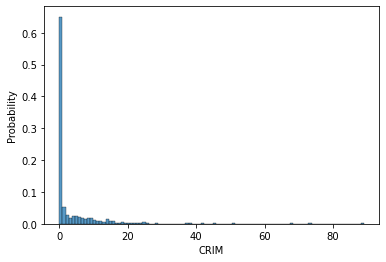

In [26]:
# Plot an historgram of the CRIM variable
sns.histplot(data=df, x="CRIM", stat="probability", bins="auto")

## Drop some of the features of the dataset
Assume which features won't explain the crime rate and drop the associated columns of the dataframe.

Would the number of rooms have an impact on the crime rate? 
First let's explore the min, max, means and standard deviation for RM.
Also output correlation with CRIM.

In [6]:
RM_max = df["RM"].max()
RM_min = df["RM"].min()
RM_mean = df["RM"].mean()
RM_std = df["RM"].std()
CRIM_RM_corr = df[["CRIM", "RM"]].corr(method="pearson")
print(RM_max)
print(RM_min)
print(RM_mean)
print(RM_std)
print(CRIM_RM_corr.loc["CRIM","RM"])

8.78
3.561
6.284634387351787
0.7026171434153237
-0.21924670286251308


Same work on the entire dataframe directly

In [7]:
df.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

In [8]:
df.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64

In [9]:
df.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

In [10]:
df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


TAX and RAD have a correlation coefficient of 0.910228 which is close to 1. Let's drop RAD (although the cutting threshold is rather arbitrary). I could have chosen to drop TAX instead. This choice is rather arbitrary, although intuitively it makes sense that crime rate is related to earnings.

In [12]:
df.drop(columns=["TAX"], inplace=True)
column_names = df.columns
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48,22.0


# standardizing the features
Standardizing means removing the mean and scaling the data with the standard deviation.
Note that standardization requirements depend on the ML technique to create the model.
For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order.

In [13]:
scaler = StandardScaler().fit(df)
print(scaler.mean_)
print(scaler.scale_)

[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 1.84555336e+01 3.56674032e+02 1.26530632e+01
 2.25328063e+01]
[ 8.59304135 23.29939569  6.85357058  0.25374293  0.11576312  0.70192251
 28.12103257  2.10362836  8.69865112  2.16280519 91.20460745  7.13400164
  9.18801155]


In [14]:
# standardized dataframe
dfs = scaler.transform(df) # returns an array
dfs = pd.DataFrame(dfs)
dfs.columns = column_names
print(dfs.shape)
dfs

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,1.176466,0.403225,-0.865302,-0.057989


## Only apply transformer to a subset of the dataframe's columns

In [15]:
# Columns not to transform
col1 = ["CHAS"]
# Columns to transform
col2 = list(filter(lambda val: val not in col1, column_names))  
# Apply transformers to columns col2 of the dataframe df
ct = ColumnTransformer([
        ('standard scaler', StandardScaler(), col2)
    ], remainder='passthrough')
scaler = ct.fit(df)

In [16]:
dfs2 = scaler.transform(df)
columns = col2 + ["CHAS"]
dfs2 = pd.DataFrame(dfs2, columns=columns)
dfs2[dfs2["CHAS"]==1].head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV,CHAS
142,-0.034036,-0.487722,1.231945,2.732346,-1.256028,1.117494,-1.175798,-0.523001,-1.736418,0.441052,1.985833,-0.993992,1.0
152,-0.289414,-0.487722,1.231945,2.732346,-1.813070,0.690768,-1.038607,-0.523001,-1.736418,-0.146857,-0.074721,-0.787200,1.0
154,-0.255983,-0.487722,1.231945,2.732346,-0.221726,0.975252,-0.972435,-0.523001,-1.736418,-0.390924,0.345800,-0.602177,1.0
155,-0.009137,-0.487722,1.231945,2.732346,-0.188959,0.498741,-0.974289,-0.523001,-1.736418,-2.945729,0.331782,-0.754549,1.0
160,-0.272321,-0.487722,1.231945,0.434551,-0.049342,0.854346,-0.949142,-0.523001,-1.736418,-0.194662,-1.002672,0.486198,1.0
162,-0.207116,-0.487722,1.231945,0.434551,2.161728,1.053485,-0.833960,-0.523001,-1.736418,0.361122,-1.504494,2.989460,1.0
163,-0.243744,-0.487722,1.231945,0.434551,2.978058,0.900575,-0.776298,-0.523001,-1.736418,0.348403,-1.308251,2.989460,1.0
208,-0.404706,-0.487722,-0.079780,-0.567496,-0.314329,-0.336933,0.211139,-0.637962,0.066796,0.270227,0.281320,0.203221,1.0
209,-0.369812,-0.487722,-0.079780,-0.567496,-1.340083,1.117494,0.038009,-0.637962,0.066796,0.441052,1.462985,-0.275664,1.0
210,-0.400215,-0.487722,-0.079780,-0.567496,-0.462493,0.836566,0.039008,-0.637962,0.066796,0.401032,0.647173,-0.090641,1.0


# Sampling
We could also sample a subset of the dataframe for quick preliminary analysis of the data.

In [17]:
df_reduced = df.sample(frac=0.5, replace=False)
df_reduced.shape

(253, 13)